In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

mean $$ \mu_{x} = \frac{\sum x}{N}  $$

Polulation Variance $$ \sigma^{2} = \frac{\sum(x -\mu_{x})^{2}}{N}  $$

Unbiased Sample Variance $$ \sigma^{2} = \frac{\sum(x -\mu_{x})^{2}}{N-1}  $$


In [31]:
# flip coin and calculate mean and variance
s = np.random.randint(0,2,10000)

Va = s.var()                       # population variance
Sv = s.var(ddof = 1)
print(f'Pop Mean: {s.mean()}')
print(f'Pop Variance S2: {Va}')
print(f'Sample Unbiased Variance S2: {Sv}')

Pop Mean: 0.5054
Pop Variance S2: 0.24997083999999994
Sample Unbiased Variance S2: 0.24999583958395835


### mean and unbiased variance


$$ \sigma_x = \sqrt{ \frac{\sum(x -\mu_{x})*(x -\mu_{x})}{N} } = \sqrt{\frac{\sum X*X}{N}}$$
#### Note that the values range between +1 and -1

Pop Mean: 0.5104
Pop Variance S2: 0.24989184000000006
Sample Unbiased Variance S2: 0.24991683168316836


In [42]:
# roll 6 sided dice and calculate mean and variance
s = np.random.randint(1,7,100000)
Va = s.var()                       # population variance
Sv = s.var(ddof=1)
print(f'Pop Mean: {s.mean()}')
print(f'Pop Variance S2: {Va}')
print(f'Sample Unbiased Variance S2: {Sv}')

Pop Mean: 3.49706
Pop Variance S2: 2.9185113564
Sample Unbiased Variance S2: 2.918540541805418


For trials where we take M tickets  
Trial Mean $$ \mu_{x} = \frac{\sum x}{M}  $$

Sample Distribution Variance is Population Variance divided by our M  
$$ s^{2} = \frac{\sigma^{2}}{M}  $$

Pop Variance S2: <built-in method var of numpy.ndarray object at 0x7fc51f371ee0>
var Sample: 0.6433439999999999
var Sample: 0.14919623999999998
var Sample: 0.0320176064
Best Estimate N*S2_sample : [3.2167199999999996, 2.9839247999999996, 3.2017606400000003]
Unbiased Estimate :  3.141818181818182
Biased Estimate :    3.1104000000000003


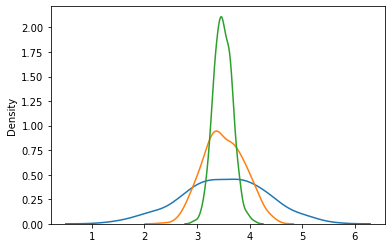

In [52]:
#  Central Limit Theorem Applied to Rolls of 6 sided dice 
#  Sample from Box taking n Tickets - then calc. mean and variance 
s = np.random.randint(1,7,100000)  # Create the box of tickets                       # population variance
print(f'Pop Variance S2: {s.var}')
N = 500                            # number of trials  
V = []

def getDistribution(s,M,N):        # args(samplePop, samplesize, num_samples)
    samples = []
    np.random.seed(seed=3)
    for i in np.arange(N):
        sample = np.random.choice(s,M).sum()/M
        samples.append(sample)
    return samples

for M in [5,20,100]:    # Change the sample size and loop
    S = getDistribution(s,M,N)     
    s2 = np.array(S).var(ddof=0)   # Variance of the mean for sample
    V.append({M:s2})               # Variance of Mean ve goes down with sample size  ve * i = pop sample variancee
    #plt.hist(S, bins=20, density=True, alpha = 0.2)
    sns.kdeplot(data=S)
    print(f'var Sample: {s2}')
                                   # print out the sample variance * N (sample number)
print(f'Best Estimate N*S2_sample : {[list(var.keys())[0] * list(var.values())[0]  for index, var in enumerate(V)]}')

testSample = np.array(np.random.choice(s,100))
print(f'Unbiased Estimate :  {testSample.var(ddof =1)}')
print(f'Biased Estimate :    {testSample.var(ddof =0)}')


In [ ]:
s = np.random.randint(1,7,100)
N = 1000   # number of times we take sample
n = 3     # sample size 
samples = []
for i in np.arange(N):
    sample = np.random.choice(s,n).sum()/n
    samples.append(sample)
plt.hist(samples, bins=10, density=True, alpha = 0.3)
sns.kdeplot(data=samples)

In [ ]:
# understand how scaling a*x + b  affects mean and variance
# N(mu,sigma**2)   =>  N(a*mu + b,  a**2 * sigma**2)
n = 4                           # number in sample
np.random.seed(seed = 1)
s = np.random.randint(1,7,n)    # get sample 
a = 1                           # scale factor = a
b = 0                           # shift = b
s1 = s + s
print(f'sample: {s} mean: {s.mean()} variance: {s.var()}' )
print(f'ScaleS: {s1} mean: {s1.mean()} variance: {s1.var()}' )



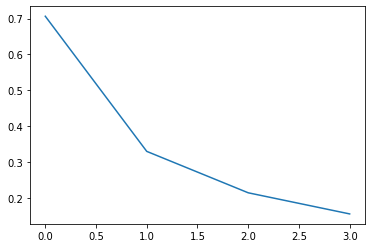

In [231]:
variance = [list(v.values())[0]   for i,v in enumerate(V)]
plt.plot(variance)

 mean1: 1.0184034691225057 variance: 1.0099690431382584
 mean2: 1.0024294617572203 variance: 0.9657788936064772
 mean12: 2.0208329308797257 variance2: 1.93701802830615


(array([0.3332, 0.    , 0.    , 0.    , 0.3198, 0.    , 0.    , 0.    ,
        0.325 , 0.    , 0.    , 0.    , 0.3392, 0.    , 0.    , 0.    ,
        0.3364, 0.    , 0.    , 0.3464]),
 array([ 2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,
         7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. ]),
 <BarContainer object of 20 artists>)

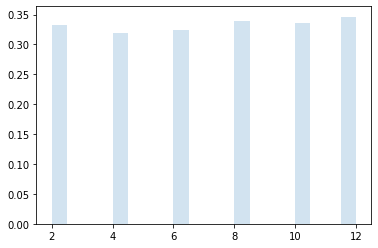

In [242]:
# what happens if we add two distributions
mu = 1
sigma = 1
s1 = np.random.normal(mu,sigma, 1000)
s2 = np.random.normal(mu,sigma, 1000)
S = s1 + s2                 # be careful - what does numpy do here

print(f' mean1: {s1.mean()} variance: {s1.var()}' )
print(f' mean2: {s2.mean()} variance: {s2.var()}' )
print(f' mean12: {S.mean()} variance2: {S.var()}' )

#plt.hist(s, bins = 20, alpha = 0.2, density=True)
plt.hist(s+s,bins = 20,  alpha = 0.2, density=True)

var1: 0.019679306645486623 var2: 0.019679306645486623


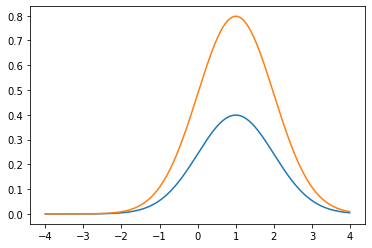

In [240]:
#  Plot from CFD curve - be careful - are we sampling population at all here ?
mu = 1
sigma = 1.000
N = 2
def normal(x, mu, sigma):
    c = 1/(sigma*np.sqrt(2*np.pi))
    return c * np.exp( -0.5*(x - mu)*(x - mu)/(sigma*sigma))
x = np.arange(-4,4,0.01)

y = normal(x, mu, sigma)
y1 = normal(x, mu, sigma)


plt.plot(x,y)
plt.plot(x,y + y1)

print(f'var1: {y.var()} var2: {y1.var()}')
